# Kép betöltése és megjelenítése

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from scipy.signal import convolve2d #2D konvolúció
import os
from PIL import Image
from scipy import ndimage

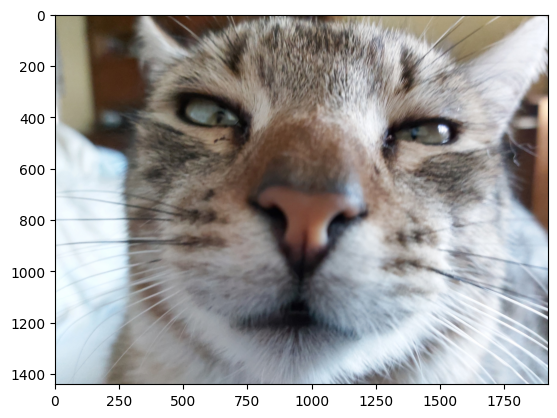

In [27]:
img = mpimg.imread('Images/cat.jpg')
imgplot = plt.imshow(img)
plt.show()


# Kép vágása

In [28]:
#image shape (height, width, depth/color)
print(img.shape)

(1440, 1920, 3)


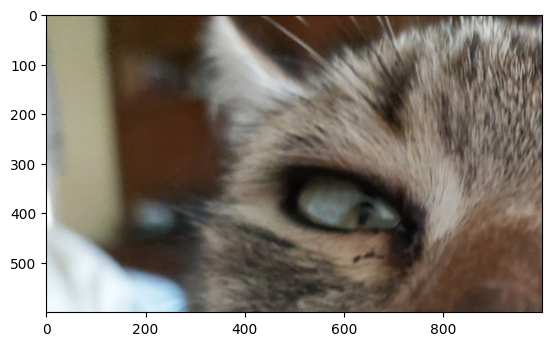

In [29]:
img_cropped = img[0:600, 0:1000, :]
imgplot = plt.imshow(img_cropped)
plt.show()

In [30]:
print(img_cropped.shape)

(600, 1000, 3)


# Kép szürkeárnyalatossá tétele
## Átlagolással

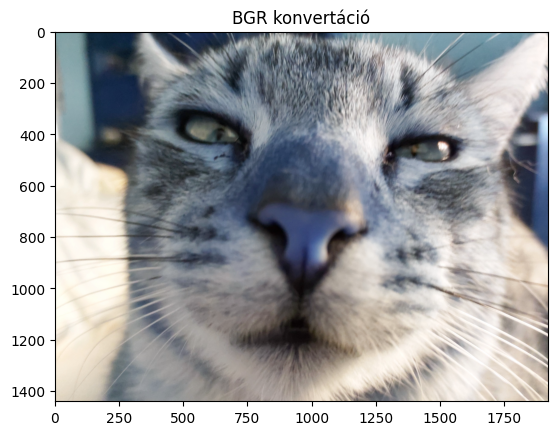

In [31]:
grey_img = cv2.imread('Images/cat.jpg')

#Transform so Matplotlib can read it correctly
fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title('BGR konvertáció')
plt.imshow(fix_img)

#Matplotlib expects Red Green Blue
#OPENCV reads as Blue Green Red

#the three channels
R, G, B = fix_img[:,:,0], fix_img[:,:,1],fix_img[:,:,2]

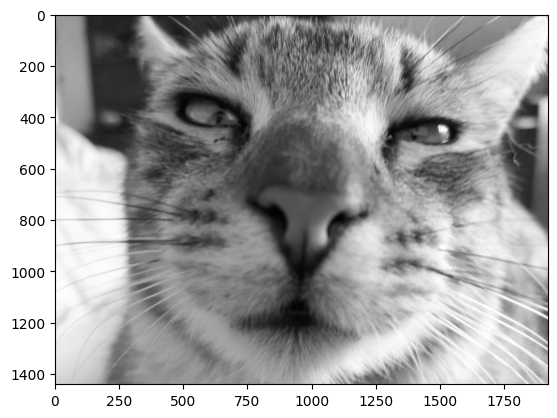

In [32]:
gray_avg_img = np.mean(fix_img, axis=2)
plt.imshow(gray_avg_img, cmap='gray')

## Súlyozott átlaggal 

In [33]:
#OpenCV grayscale conversion formula
Y = 0.299 * R + 0.587 * G + 0.114 * B
print(Y)

[[152.002 151.002 151.002 ... 161.791 161.78  161.78 ]
 [151.002 151.002 150.002 ... 164.15  162.78  161.78 ]
 [150.002 151.002 151.002 ... 168.15  163.78  159.78 ]
 ...
 [217.009 216.009 216.009 ... 193.77  194.46  194.101]
 [215.009 215.009 216.009 ... 194.77  195.813 197.101]
 [214.009 215.009 216.009 ... 195.77  194.813 195.101]]


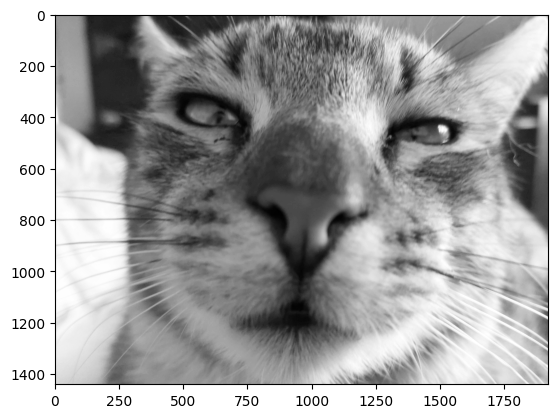

In [34]:
plt.imshow(Y, cmap='gray')

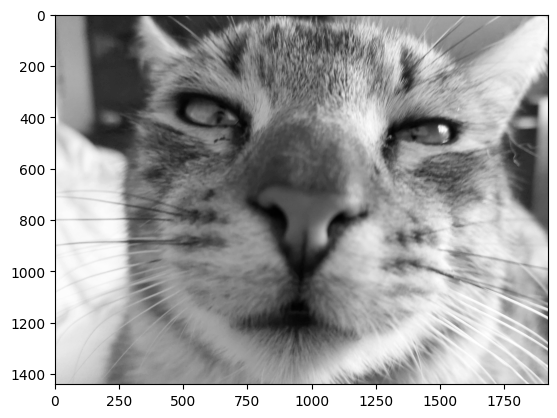

In [35]:
#OpenCV function
gray_img_ocv = cv2.imread('Images/cat.jpg', cv2.IMREAD_GRAYSCALE)
#print(gray_img_ocv)

plt.imshow(gray_img_ocv, cmap='gray')

# Hisztogram
## OpenCV

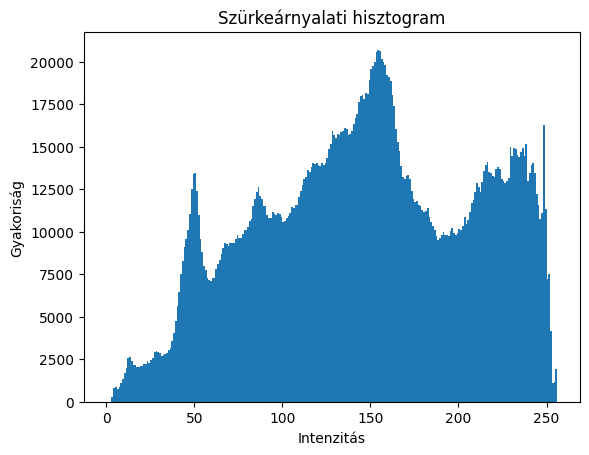

In [36]:
histg = cv2.calcHist([gray_img_ocv], [0], None, [256], [0, 256])
#cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

plt.xlabel('Intenzitás')
plt.ylabel('Gyakoriság')
plt.title('Szürkeárnyalati hisztogram')
plt.hist(gray_img_ocv.ravel(), 256, [0,256])
plt.show()

## Matplotlib

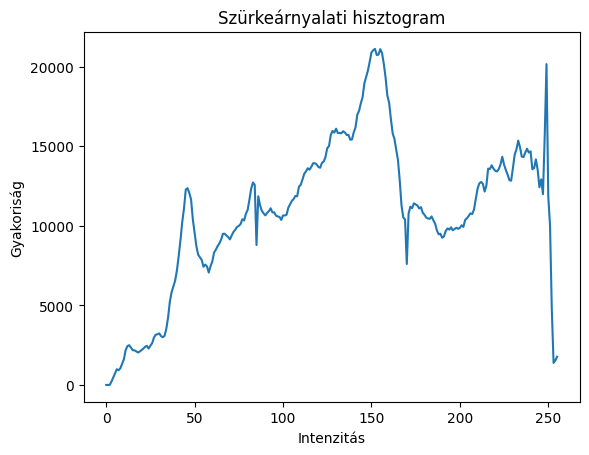

In [37]:
hist,bin = np.histogram(gray_avg_img.ravel(), 256, [0,255])

plt.plot(hist)
plt.xlabel('Intenzitás')
plt.ylabel('Gyakoriság')
plt.title('Szürkeárnyalati hisztogram')
plt.show()


# Küszöbölés

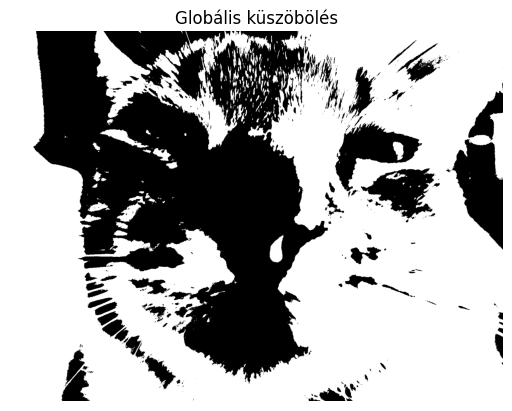

In [38]:
_, thresholded_image = cv2.threshold(gray_avg_img, 127, 255, cv2.THRESH_BINARY)

plt.figure()
plt.imshow(thresholded_image, cmap='gray')
plt.axis('off')
plt.title('Globális küszöbölés')
plt.show()


# Átlagoló szűrő 
## OpenCV

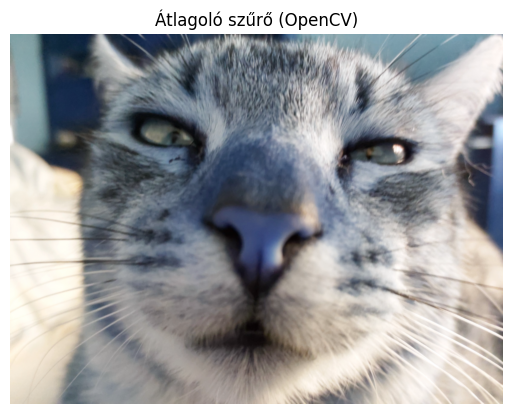

In [39]:
kernel_size = (3, 3)  # A szűrő mérete (pl. 3x3)
filtered_image = cv2.blur(img, kernel_size)

plt.figure()
plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Átlagoló szűrő (OpenCV)')
plt.show()

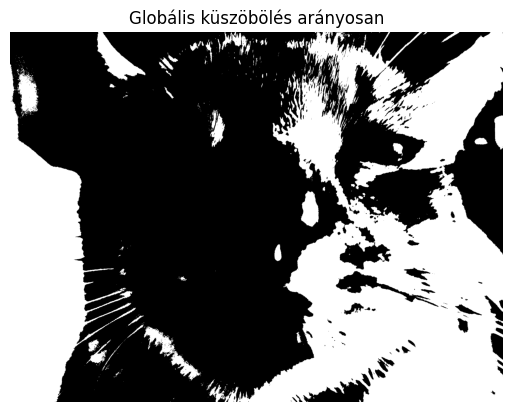

In [40]:
def global_threshold_ratio(image, ratio):
    # Kép konvertálása szürkeárnyalatossá
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Küszöbérték meghatározása az adott arány alapján
    threshold_value = np.percentile(gray_image, ratio * 100)
    
    # Küszöbölés
    _, thresholded_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
    
    return thresholded_image


thresh_img = global_threshold_ratio(img, .6)


plt.figure()
plt.imshow(thresh_img, cmap='gray')
plt.axis('off')
plt.title('Globális küszöbölés arányosan')
plt.show()


 Mivel a küszöbérték meghatározása a percentilis pont alapján történik,
 a pontos közelítés függ a kép intenzitáseloszlásától és a kiválasztott aránytól. 
 Általánosságban elmondható, hogy minél jobban közelít az intenzitáseloszlás az egyenletes eloszláshoz,
 annál pontosabb lesz a közelítés.

## Kézi implementáció

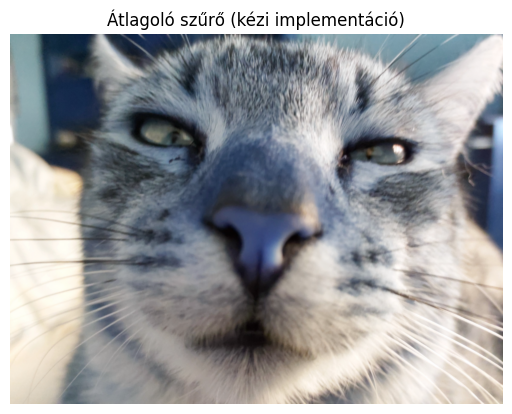

In [41]:
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Kép átalakítása RGB formátumba

kernel_size = (3, 3)  # A szűrő mérete (pl. 3x3)
kernel = np.ones(kernel_size) / np.prod(kernel_size)

filtered_image_r = convolve2d(image_rgb[:,:,0], kernel, mode='same', boundary='symm')
filtered_image_g = convolve2d(image_rgb[:,:,1], kernel, mode='same', boundary='symm')
filtered_image_b = convolve2d(image_rgb[:,:,2], kernel, mode='same', boundary='symm')

filtered_image = np.stack((filtered_image_r, filtered_image_g, filtered_image_b), axis=2).astype(np.uint8)

plt.figure()
plt.imshow(filtered_image)
plt.axis('off')
plt.title('Átlagoló szűrő (kézi implementáció)')
plt.show()

## Különböző kernel méretekkel

In [42]:
def average_filter(image, kernel_size):
    # Átlagoló szűrő alkalmazása
    filtered_image = cv2.blur(image, (kernel_size, kernel_size))
    return filtered_image

# Kép betöltése
img = cv2.imread('Images/blurry.jpg', cv2.IMREAD_GRAYSCALE)

# Kernel méretek léptetése
start = 3
stop = 101
step = 2
kernel_sizes = list(range(start, stop+1, step))

# Kimeneti mappa létrehozása
output_dir = 'average_filter'
os.makedirs(output_dir, exist_ok=True)

# Átlagolt képek elmentése különböző kernel méretekkel
for kernel_size in kernel_sizes:
    filtered_image = average_filter(img, kernel_size)
    file_name = f'{kernel_size}x{kernel_size}.png'
    file_path = os.path.join(output_dir, file_name)
    cv2.imwrite(file_path, filtered_image)


## Nem négyzetes kernel

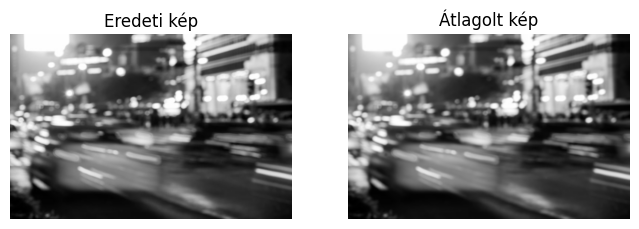

In [43]:

def average_filter(image, kernel):
    # Átlagoló szűrő alkalmazása
    filtered_image = cv2.filter2D(image, -1, kernel)
    
    return filtered_image

# Kernel definiálása
kernel = np.array([[1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]])


# Átlagoló szűrő alkalmazása nem négyzetes kernellel
filtered_image = average_filter(img, kernel)

# Eredmény megjelenítése
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Eredeti kép')
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
axs[1].set_title('Átlagolt kép')
axs[1].axis('off')

plt.show()

A kernel értékeit lineárisan beállítottam 1/9-re, 
hogy megfeleljenek egy pontosabb átlagoló szűrőnek. 
Ez a kernel súlyozott átlagolást eredményez, amely nem módosítja a kép világosságát.


# Medián szűrés

In [44]:
def median_filter(image, kernel_size):
    # Mediánszűrő alkalmazása
    filtered_image = cv2.medianBlur(image, kernel_size)
    
    return filtered_image

# Kernel méretek léptetése
start = 3
stop = 101
step = 2
kernel_sizes = list(range(start, stop+1, step))

# Kimeneti mappa létrehozása
output_dir = 'median_filter'
os.makedirs(output_dir, exist_ok=True)

# Mediánszűrő alkalmazása különböző kernel méretekkel
filtered_images = []
for kernel_size in kernel_sizes:
    filtered_image = median_filter(img, kernel_size)
    filtered_images.append(filtered_image)
    
    # Eredmények mentése fájlba
    file_name = f'{kernel_size}x{kernel_size}.png'
    file_path = os.path.join(output_dir, file_name)
    cv2.imwrite(file_path, filtered_image)



# Lokális küszöbölés

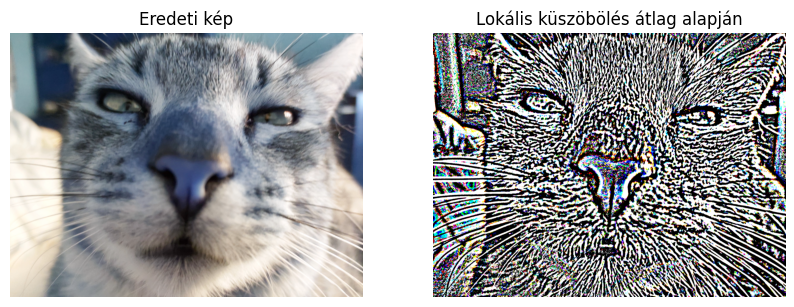

In [45]:

def local_threshold_mean(image, kernel_size):
    # Átlagszűrő alkalmazása a küszöbérték meghatározásához
    blurred_image = cv2.blur(image, (kernel_size, kernel_size))
    
    # Konvolúció az eredeti képpel
    convolved_image = cv2.filter2D(image, -1, np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size))
    
    # Lokális küszöbölés az átlag alapján
    thresholded_image = np.where(image > convolved_image, 255, 0).astype(np.uint8)
    
    return thresholded_image

# Lokális küszöbölés alkalmazása
kernel_size = 25
thresholded_image = local_threshold_mean(grey_img, kernel_size)

# Eredmények megjelenítése
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(grey_img, cmap='gray')
axs[0].set_title('Eredeti kép')
axs[0].axis('off')

axs[1].imshow(thresholded_image, cmap='gray')
axs[1].set_title('Lokális küszöbölés átlag alapján')
axs[1].axis('off')

plt.show()


# Élkiemelés
## Roberts filter

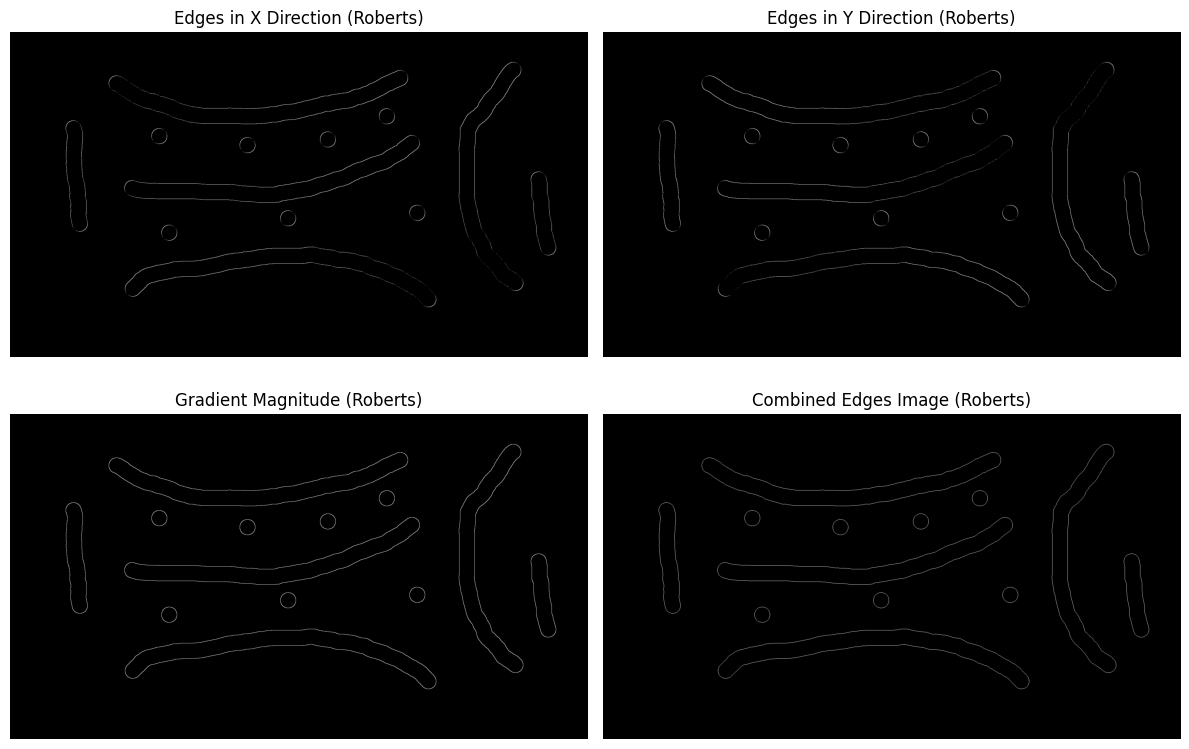

In [46]:

roberts_cross_v = np.array([[1, 0],
                            [0, -1]])

roberts_cross_h = np.array([[0, 1],
                            [-1, 0]])

img = cv2.imread("Images/lines.png", 0).astype('float64')
img /= 255.0
vertical = ndimage.convolve(img, roberts_cross_v)
horizontal = ndimage.convolve(img, roberts_cross_h)

# Kombináljuk az eredményeket az élek meghatározásához
edges_x = np.abs(vertical).astype(np.uint8)
edges_y = np.abs(horizontal).astype(np.uint8)

# Gradiens magnitúdó számítása
gradient_magnitude = np.sqrt(vertical**2 + horizontal**2).astype(np.uint8)

# Eredmények megjelenítése a matplotlib segítségével
plt.figure(figsize=(12, 8))

# Az élek képei
plt.subplot(2, 2, 1)
plt.imshow(edges_x, cmap='gray')
plt.title("Edges in X Direction (Roberts)")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(edges_y, cmap='gray')
plt.title("Edges in Y Direction (Roberts)")
plt.axis("off")

# Gradiens magnitúdó
plt.subplot(2, 2, 3)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude (Roberts)")
plt.axis("off")

# Kombinált élek képe
edges_combined = edges_x + edges_y
edges_combined_normalized = cv2.normalize(edges_combined, None, 0, 255, cv2.NORM_MINMAX)
plt.subplot(2, 2, 4)
plt.imshow(edges_combined_normalized, cmap='gray')
plt.title("Combined Edges Image (Roberts)")
plt.axis("off")

plt.tight_layout()
plt.show()

A kontúrok már teljesen jól látszanak. A számítás hibás volt. Az élek egyesítése hasonló eredményt ad, mint a gradiens magnitúdó, annyi különbséggel hogy a kontúrok így lágyabbak.

## Sobel filter

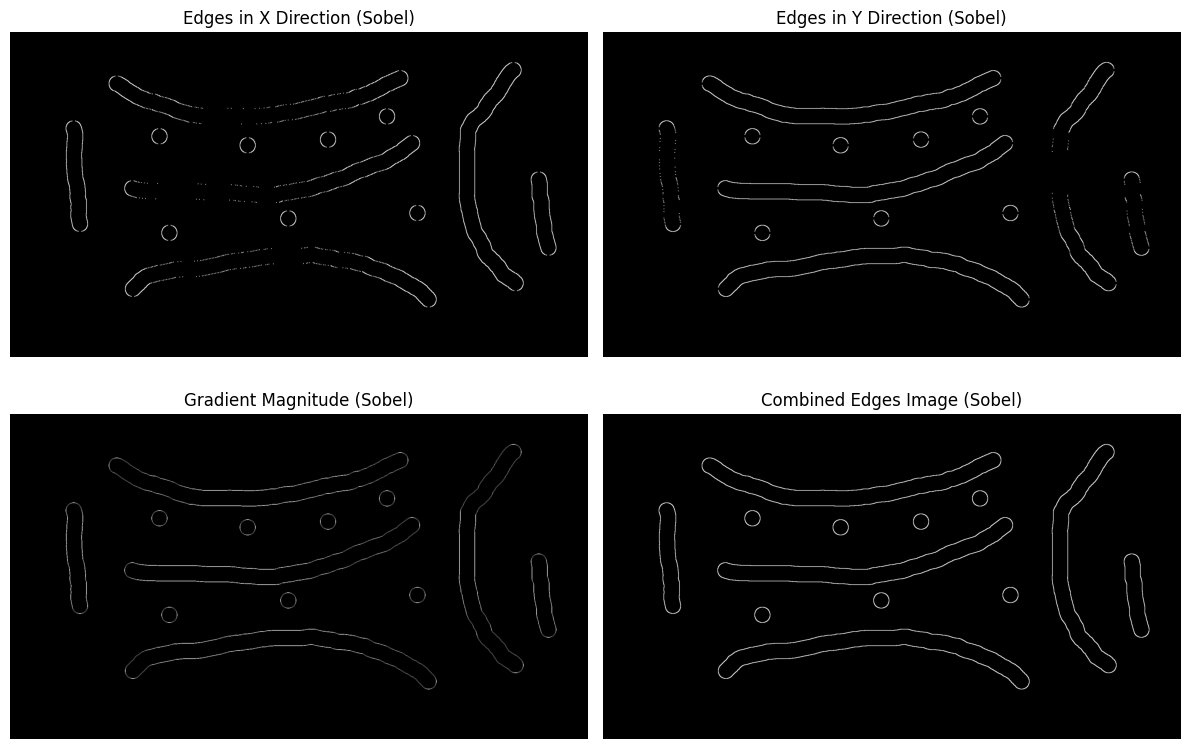

In [47]:
def sobel_filter(image):
    # Konvertáljuk a képet szürkeárnyalatosra, ha szükséges
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Alkalmazzuk a Sobel szűrőt a képre az x és y irányban
    gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Kombináljuk az eredményeket az élek meghatározásához
    edges_x = np.abs(gradient_x).astype(np.uint8)
    edges_y = np.abs(gradient_y).astype(np.uint8)

    # Gradiens magnitúdó számítása
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2).astype(np.uint8)

    return edges_x, edges_y, gradient_magnitude

# Kép beolvasása
input_image = cv2.imread("Images/lines.png")

# Sobel szűrő alkalmazása a képre az x és y irányban
edges_x, edges_y, gradient_magnitude = sobel_filter(input_image)

# Eredmények megjelenítése a matplotlib segítségével
plt.figure(figsize=(12, 8))

# Az élek képei
plt.subplot(2, 2, 1)
plt.imshow(edges_x, cmap='gray')
plt.title("Edges in X Direction (Sobel)")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(edges_y, cmap='gray')
plt.title("Edges in Y Direction (Sobel)")
plt.axis("off")

# Gradiens magnitúdó
plt.subplot(2, 2, 3)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude (Sobel)")
plt.axis("off")

# Kombinált élek képe
edges_combined = edges_x + edges_y
edges_combined_normalized = cv2.normalize(edges_combined, None, 0, 255, cv2.NORM_MINMAX)
plt.subplot(2, 2, 4)
plt.imshow(edges_combined_normalized, cmap='gray')
plt.title("Combined Edges Image (Sobel)")
plt.axis("off")

plt.tight_layout()
plt.show()


Mint a Roberts szűrővel itt is hasonló eredményt kapunk, mint a gradiens magnitúdó, de a kontúrok jóval erősebbek.

# Élkiemelés konvolúciós mátrixszokkal

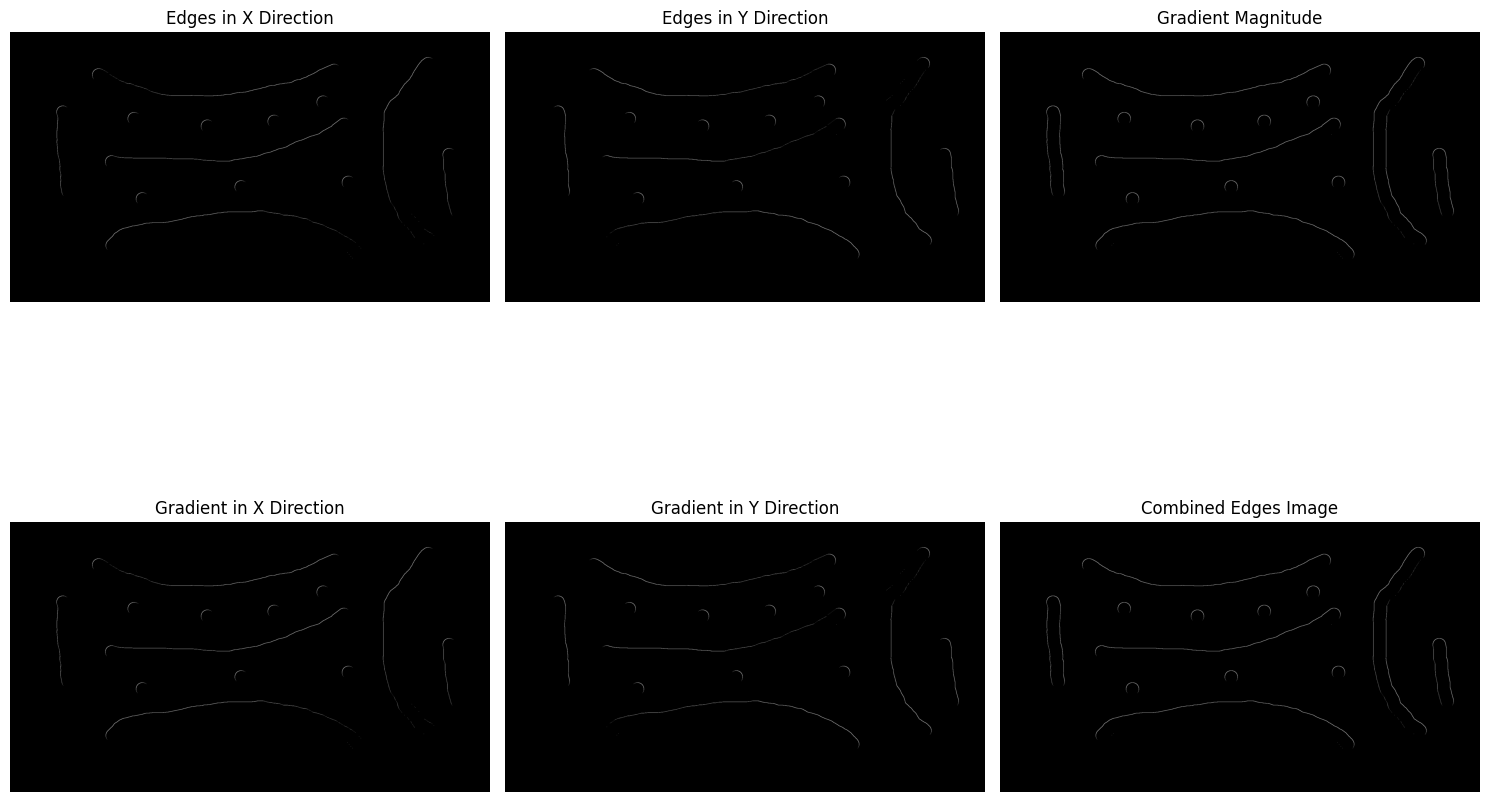

In [48]:
def roberts_filter(image):
    # Konvertáljuk a képet szürkeárnyalatosra, ha szükséges
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Definiáljuk a Roberts operátorokat
    roberts_x = np.array([[1, 0], [0, -1]])
    roberts_y = np.array([[0, 1], [-1, 0]])

    # Alkalmazzuk a Roberts szűrőt a képre az x és y irányban
    filtered_x = cv2.filter2D(image, -1, roberts_x)
    filtered_y = cv2.filter2D(image, -1, roberts_y)

    # Kombináljuk az eredményeket az élek meghatározásához
    edges_x = np.abs(filtered_x).astype(np.uint8)
    edges_y = np.abs(filtered_y).astype(np.uint8)

    # Gradiens magnitúdó számítása
    gradient_magnitude = np.sqrt(filtered_x**2 + filtered_y**2).astype(np.uint8)

    return edges_x, edges_y, gradient_magnitude, filtered_x, filtered_y

# Kép beolvasása
input_image = cv2.imread("Images/lines.png")

# Roberts szűrő alkalmazása a képre az x és y irányban
edges_x, edges_y, gradient_magnitude, gradient_x, gradient_y = roberts_filter(input_image)

# Eredmények megjelenítése a matplotlib segítségével
plt.figure(figsize=(15, 12))

# Az élek képei
plt.subplot(2, 3, 1)
plt.imshow(edges_x, cmap='gray')
plt.title("Edges in X Direction")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(edges_y, cmap='gray')
plt.title("Edges in Y Direction")
plt.axis("off")

# Gradiens magnitúdó
plt.subplot(2, 3, 3)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis("off")

# Gradiens az x irányban
plt.subplot(2, 3, 4)
plt.imshow(np.abs(gradient_x), cmap='gray')
plt.title("Gradient in X Direction")
plt.axis("off")

# Gradiens az y irányban
plt.subplot(2, 3, 5)
plt.imshow(np.abs(gradient_y), cmap='gray')
plt.title("Gradient in Y Direction")
plt.axis("off")

# Kombinált élek képe
edges_combined = edges_x + edges_y
edges_combined_normalized = cv2.normalize(edges_combined, None, 0, 255, cv2.NORM_MINMAX)
plt.subplot(2, 3, 6)
plt.imshow(edges_combined_normalized, cmap='gray')
plt.title("Combined Edges Image")
plt.axis("off")
plt.tight_layout()
plt.show()


# Blobdetektálás

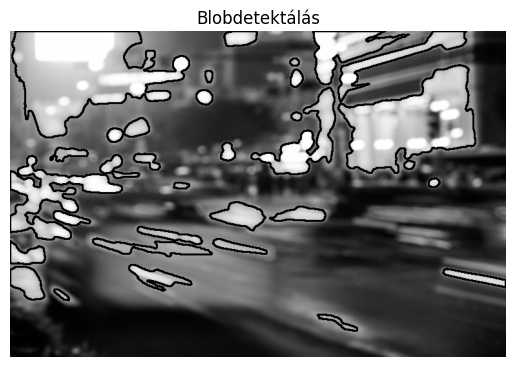

In [49]:
def blob_detector(image_path, min_area=100):
    # Kép beolvasása
    image = cv2.imread(image_path, 0)
    
    # Binarizálás
    _, binary_image = cv2.threshold(image, 160, 255, cv2.THRESH_BINARY)
    
    # Kontúrkeresés a binarizált képen
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Szűrés a kontúrokon a kívánt kritériumok alapján (pl. terület)
    filtered_contours = [contour for contour in contours if cv2.contourArea(contour) > min_area]
    
    # Blobok kiemelése a képen
    image_with_blobs = cv2.drawContours(image.copy(), filtered_contours, -1, (0, 255, 0), 2)
    
    return image_with_blobs

# Tesztelés
input_image = "Images/blurry.jpg"
image_with_blobs = blob_detector(input_image)

# Eredmények megjelenítése
plt.imshow(image_with_blobs, cmap='gray')
plt.title('Blobdetektálás')
plt.axis('off')
plt.show()


# Vonalkövetés

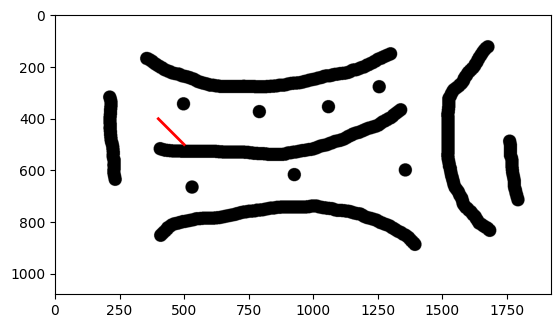

In [50]:
def follow_line(image, start_point, num_steps):
    current_point = start_point
    line_points = [current_point]

    for _ in range(num_steps):
        x, y = current_point
        neighborhood = [(x-1, y-1), (x, y-1), (x+1, y-1), (x-1, y), (x+1, y), (x-1, y+1), (x, y+1), (x+1, y+1)]

        next_point = None
        min_value = float('inf')

        for neighbor in neighborhood:
            nx, ny = neighbor
            if nx >= 0 and ny >= 0 and nx < image.width and ny < image.height:
                value = image.getpixel((nx, ny))
                if value < min_value:
                    min_value = value
                    next_point = neighbor

        if next_point is None:
            break

        current_point = next_point
        line_points.append(current_point)

    return line_points

# Kép beolvasása
image = Image.open("Images/lines.png").convert("L")  # Átalakítás szürkeárnyalatos képre

# Kezdőpont meghatározása
start_point = (500, 500)

# Lépésszám meghatározása
num_steps = 100

# Vonalkövetés
line_points = follow_line(image, start_point, num_steps)

# Eredmény megjelenítése
plt.imshow(image, cmap='gray')
plt.plot(*zip(*line_points), color='red', linewidth=2)
plt.show()




Ez a program egy vonalkövető algoritmust valósít meg, 
amely egy adott képen egy kiindulópontból egy adott számú lépést tesz meg, és végigköveti a vonalat. 
A vonalkövetés során az algoritmus minden lépésben kiválasztja a legközelebbi szomszédos pontot, 
amelynek pixelértéke a legalacsonyabb. 
Az algoritmus ezáltal megtalálja a vonal irányát és az általa megtett pontokat piros vonallal ábrázolja
az eredeti képen.